# Probability - Hypothesis Testing Pacmann Project

## Import library

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import itertools
import random as rd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from matplotlib.pyplot import figure

from scipy import stats
from scipy.stats import chi2_contingency
from scipy.stats import levene
from scipy.stats import ttest_ind
from statsmodels.stats.proportion import proportions_ztest

In [2]:
df = pd.read_csv('dataset/Salary.csv')
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary,Country,Race,Senior
0,32.0,Male,1,Software Engineer,5.0,90000.0,UK,White,0
1,28.0,Female,2,Data Analyst,3.0,65000.0,USA,Hispanic,0
2,45.0,Male,3,Manager,15.0,150000.0,Canada,White,1
3,36.0,Female,1,Sales Associate,7.0,60000.0,USA,Hispanic,0
4,52.0,Male,2,Director,20.0,200000.0,USA,Asian,0


## Data cleaning

In [3]:
# duplikasi dataframe untuk workbook
df_work = df.copy()
df_work.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6684 entries, 0 to 6683
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6684 non-null   float64
 1   Gender               6684 non-null   object 
 2   Education Level      6684 non-null   int64  
 3   Job Title            6684 non-null   object 
 4   Years of Experience  6684 non-null   float64
 5   Salary               6684 non-null   float64
 6   Country              6684 non-null   object 
 7   Race                 6684 non-null   object 
 8   Senior               6684 non-null   int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 470.1+ KB


### Mencari null values

In [4]:
# cari row yang memiliki nilai null
df_work.isnull().sum()

Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
Country                0
Race                   0
Senior                 0
dtype: int64

### Mencari data yang duplikat

In [6]:
# cari duplicated values
df_work.duplicated().sum()

1536

Setelah diperiksa, ditemukan sebanyak 1536 merupakan data yang duplicated. Perlu dilakukan pembersihan data dengan menghapus data yang sama di dataset.

In [7]:
# drop duplicated values
df_work.drop_duplicates(inplace = True)

# verifikasi duplicated values
df_work.duplicated().sum()

0

Sudah tidak terdapat data yang duplicated.

# 1. Analisa Deskriptif Statistik

In [8]:
df_work.describe()

,Age,Education Level,Years of Experience,Salary,Senior
count,5148.000000,5148.000000,5148.000000,5148.000000,5148.000000
mean,34.001166,1.640831,8.336636,114272.010878,0.160256
std,7.762879,0.882762,6.233548,52458.684724,0.366879
min,21.000000,0.000000,0.000000,350.000000,0.000000
25%,28.000000,1.000000,3.000000,70000.000000,0.000000
50%,32.000000,1.000000,7.000000,113448.500000,0.000000
75%,39.000000,2.000000,12.000000,160000.000000,0.000000
max,62.000000,3.000000,34.000000,250000.000000,1.000000


### a. Berapa rata-rata umur pegawai?

In [9]:
# menghitung rata-rata umur
mean_age = df["Age"].mean()

print(f"Rata-rata umur pegawai dari data adalah {mean_age:.0f} tahun.")

Rata-rata umur pegawai dari data adalah 34 tahun.


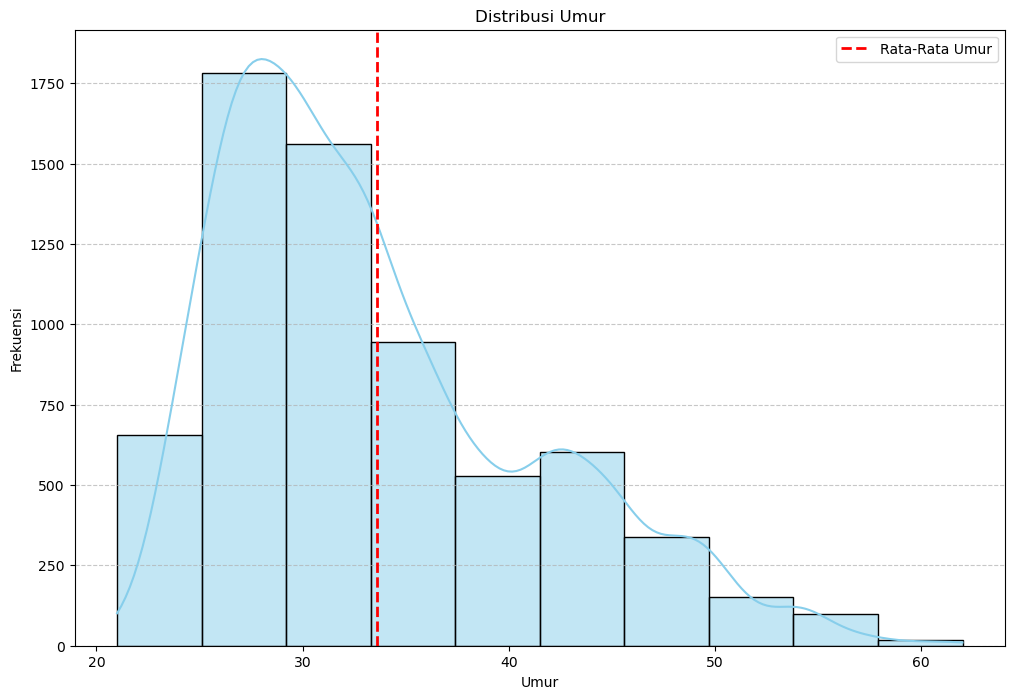

In [10]:
# Visualisasi dengan Matplotlib dan Seaborn
plt.figure(figsize=(12, 8))

# Plot histogram dengan seaborn
sns.histplot(df['Age'], bins=10, kde=True, color='skyblue', edgecolor='black')

# Tambahkan garis vertikal untuk rata-rata umur
mean_age = df['Age'].mean()
plt.axvline(mean_age, color='red', linestyle='dashed', linewidth=2, label='Rata-Rata Umur')

# Tambahkan judul dan label sumbu
plt.xlabel('Umur')
plt.ylabel('Frekuensi')
plt.title('Distribusi Umur')

# Tambahkan grid untuk memudahkan membaca
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan legenda
plt.legend()

# Simpan plot sebagai file gambar
plt.savefig("assets/0-distribusi-umur.jpeg")


# Tampilkan plot
plt.show()

### b. Berapa rata-rata tahun pengalaman kerja pegawai?

In [11]:
# Menghitung rata-rata tahun pengalaman kerja pegawai
average_yoe = df['Years of Experience'].mean()

print(f"Rata-rata tahun pengalaman kerja pegawai dari data adalah {average_yoe:.2f} tahun.")

Rata-rata tahun pengalaman kerja pegawai dari data adalah 8.08 tahun.


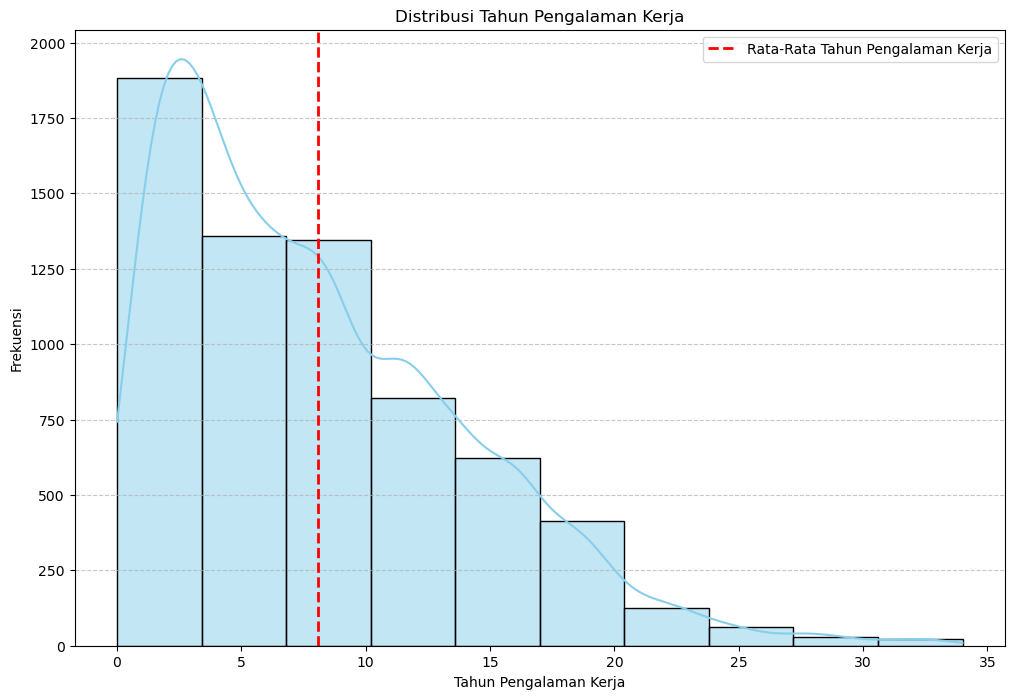

In [12]:
# Visualisasi dengan Seaborn dan Matplotlib
plt.figure(figsize=(12, 8))

# Plot histogram dan KDE dengan seaborn
sns.histplot(data=df, x='Years of Experience', bins=10, kde=True, color='skyblue', edgecolor='black')

# Tambahkan garis vertikal untuk rata-rata tahun pengalaman kerja
average_yoe = df['Years of Experience'].mean()
plt.axvline(average_yoe, color='red', linestyle='dashed', linewidth=2, label='Rata-Rata Tahun Pengalaman Kerja')

# Tambahkan judul dan label sumbu
plt.xlabel('Tahun Pengalaman Kerja')
plt.ylabel('Frekuensi')
plt.title('Distribusi Tahun Pengalaman Kerja')

# Tambahkan grid untuk memudahkan membaca
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan legenda
plt.legend()

# Simpan plot sebagai file gambar
plt.savefig("assets/distribusi-yoe.png")

# Tampilkan plot
plt.show()

### c. Berapa rata-rata tahun pengalaman kerja pegawai yang dimiliki oleh pegawai yang memiliki posisi senior?

In [39]:
# Rata-rata tahun pengalaman kerja pegawai yang memiliki posisi senior
mean_experience_senior = df_work[df_work['Senior'] == 1]['Years of Experience'].mean()
print(f"Rata-rata tahun pengalaman kerja pegawai yang memiliki posisi senior: {mean_experience_senior:.2f} tahun.")


Rata-rata tahun pengalaman kerja pegawai yang memiliki posisi senior: 12.85 tahun.


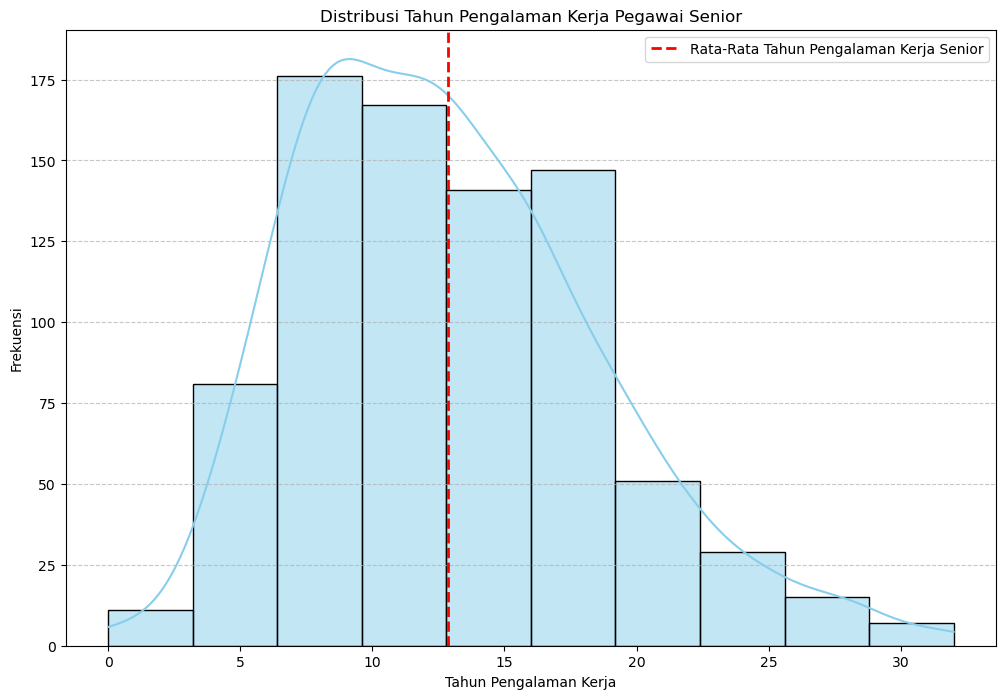

In [17]:
plt.figure(figsize=(12, 8))

# Plot histogram dan KDE dengan seaborn
sns.histplot(data=df_work[df_work['Senior'] == 1], x='Years of Experience', bins=10, kde=True, color='skyblue', edgecolor='black')

# Tambahkan garis vertikal untuk rata-rata tahun pengalaman kerja
average_yoe_senior = df_work[df_work['Senior'] == 1]['Years of Experience'].mean()
plt.axvline(average_yoe_senior, color='red', linestyle='dashed', linewidth=2, label='Rata-Rata Tahun Pengalaman Kerja Senior')

# Tambahkan judul dan label sumbu
plt.xlabel('Tahun Pengalaman Kerja')
plt.ylabel('Frekuensi')
plt.title('Distribusi Tahun Pengalaman Kerja Pegawai Senior')

# Tambahkan grid untuk memudahkan membaca
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan legenda
plt.legend()

# Simpan plot sebagai file gambar
plt.savefig("assets/distribusi-yoe-senior.png")

# Tampilkan plot
plt.show()

### d. Berapa rata-rata gaji pegawai yang memiliki posisi senior?

In [40]:
# Rata-rata gaji pegawai yang memiliki posisi senior
mean_salary_senior = df_work[df_work['Senior'] == 1]['Salary'].mean()
print(f"Rata-rata gaji pegawai yang memiliki posisi senior: ${mean_salary_senior:.2f}")


Rata-rata gaji pegawai yang memiliki posisi senior: $142449.68


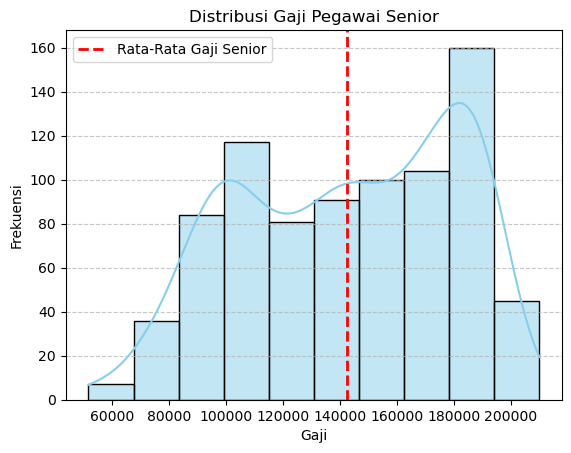

In [19]:
# Plot histogram dan KDE dengan seaborn
sns.histplot(data=df_work[df_work['Senior'] == 1], x='Salary', bins=10, kde=True, color='skyblue', edgecolor='black')

# Tambahkan garis vertikal untuk rata-rata gaji
average_salary_senior = df_work[df_work['Senior'] == 1]['Salary'].mean()
plt.axvline(average_salary_senior, color='red', linestyle='dashed', linewidth=2, label='Rata-Rata Gaji Senior')

# Tambahkan judul dan label sumbu
plt.xlabel('Gaji')
plt.ylabel('Frekuensi')
plt.title('Distribusi Gaji Pegawai Senior')

# Tambahkan grid untuk memudahkan membaca
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Tambahkan legenda
plt.legend()

# Simpan plot sebagai file gambar
plt.savefig("assets/distribusi-gaji-senior.png")

# Tampilkan plot
plt.show()

### e. Apakah rata-rata umur perempuan dan laki-laki yang merupakan senior sama?

In [43]:
# Rata-rata umur perempuan yang merupakan senior
mean_age_female_senior = df_work[(df_work['Senior'] == 1) & (df_work['Gender'] == 'Female')]['Age'].mean()

# Rata-rata umur laki-laki yang merupakan senior
mean_age_male_senior = df_work[(df_work['Senior'] == 1) & (df_work['Gender'] == 'Male')]['Age'].mean()

print(f"Rata-rata umur perempuan senior: {mean_age_female_senior:.2f} tahun.")
print(f"Rata-rata umur laki-laki senior: {mean_age_male_senior:.2f} tahun.")

if mean_age_female_senior == mean_age_male_senior:
    print("Rata-rata umur perempuan dan laki-laki yang memiliki posisi senior sama.")
else:
    print("Rata-rata umur perempuan dan laki-laki yang memiliki posisi senior tidak sama.")


Rata-rata umur perempuan senior: 39.42 tahun.
Rata-rata umur laki-laki senior: 40.12 tahun.
Rata-rata umur perempuan dan laki-laki yang memiliki posisi senior tidak sama.


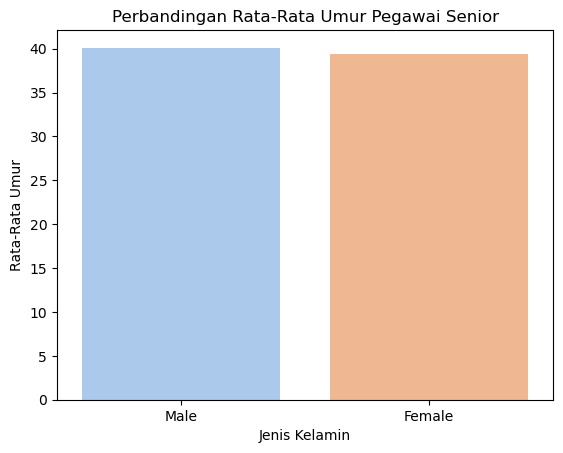

In [23]:
# Bar plot untuk rata-rata umur perempuan dan laki-laki senior
sns.barplot(x='Gender', y='Age', data=df_work[df_work['Senior'] == 1], errorbar=None, palette='pastel')

# Tambahkan judul dan label sumbu
plt.xlabel('Jenis Kelamin')
plt.ylabel('Rata-Rata Umur')
plt.title('Perbandingan Rata-Rata Umur Pegawai Senior')

# Simpan plot sebagai file gambar
plt.savefig("assets/perbandingan-umur-senior.png")

# Tampilkan plot
plt.show()

### f. Mana yang lebih tinggi, rata rata pengalaman kerja pegawai laki-laki senior atau perempuan senior?

In [45]:
# Rata-rata pengalaman kerja pegawai laki-laki senior
mean_experience_male_senior = df_work[(df_work['Senior'] == 1) & (df_work['Gender'] == 'Male')]['Years of Experience'].mean()

# Rata-rata pengalaman kerja pegawai perempuan senior
mean_experience_female_senior = df_work[(df_work['Senior'] == 1) & (df_work['Gender'] == 'Female')]['Years of Experience'].mean()

print(f"Rata-rata pengalaman kerja pegawai laki-laki yang memiliki posisi senior: {mean_experience_male_senior:.2f} tahun.")
print(f"Rata-rata pengalaman kerja pegawai perempuan yang memiliki posisi senior: {mean_experience_female_senior:.2f} tahun.")

if mean_experience_male_senior > mean_experience_female_senior:
    print("Rata-rata pengalaman kerja pegawai laki-laki senior lebih tinggi.")
elif mean_experience_male_senior < mean_experience_female_senior:
    print("Rata-rata pengalaman kerja pegawai perempuan senior lebih tinggi.")
else:
    print("Rata-rata pengalaman kerja pegawai laki-laki dan perempuan senior sama.")


Rata-rata pengalaman kerja pegawai laki-laki yang memiliki posisi senior: 13.05 tahun.
Rata-rata pengalaman kerja pegawai perempuan yang memiliki posisi senior: 12.59 tahun.
Rata-rata pengalaman kerja pegawai laki-laki senior lebih tinggi.


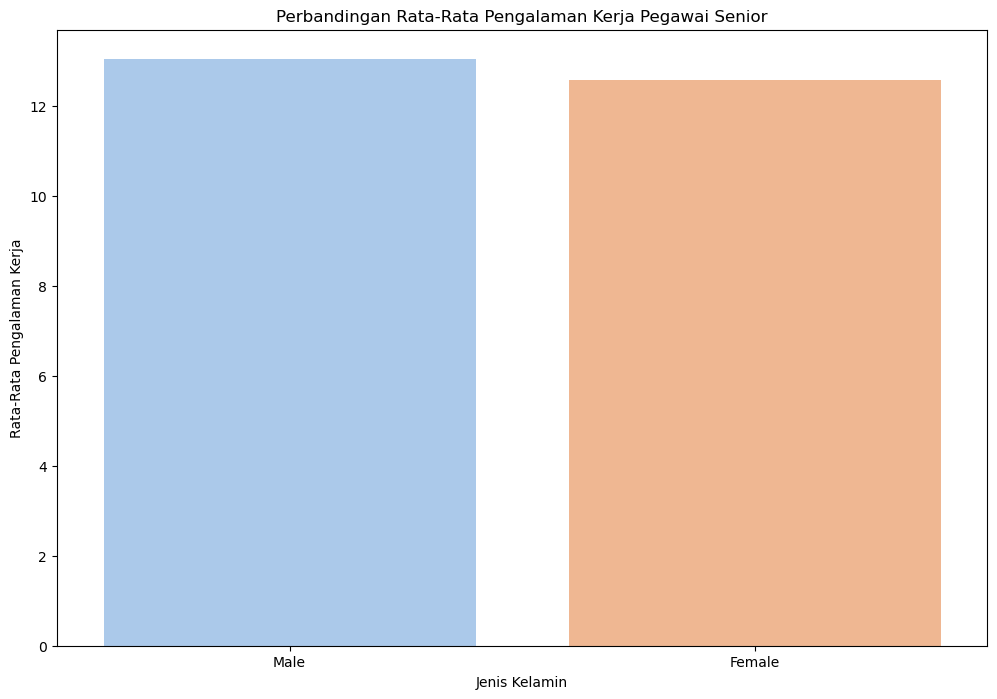

In [28]:
plt.figure(figsize=(12, 8))

# Bar plot untuk rata-rata pengalaman kerja laki-laki dan perempuan senior
sns.barplot(x='Gender', y='Years of Experience', data=df_work[df_work['Senior'] == 1], errorbar=None, palette='pastel')

# Tambahkan judul dan label sumbu
plt.xlabel('Jenis Kelamin')
plt.ylabel('Rata-Rata Pengalaman Kerja')
plt.title('Perbandingan Rata-Rata Pengalaman Kerja Pegawai Senior')

# Simpan plot sebagai file gambar
plt.savefig("assets/perbandingan-pengalaman-senior.png")

# Tampilkan plot
plt.show()


# 2. Analisa Variabel Diskrit

### a. Gender mana yang memilki gaji paling tinggi?

In [56]:
# Gender mana yang memiliki gaji paling tinggi?
highest_salary_gender = df.groupby('Gender')['Salary'].mean().idxmax()
print(f"Gender dengan gaji paling tinggi: {highest_salary_gender}")

Gender dengan gaji paling tinggi: Male


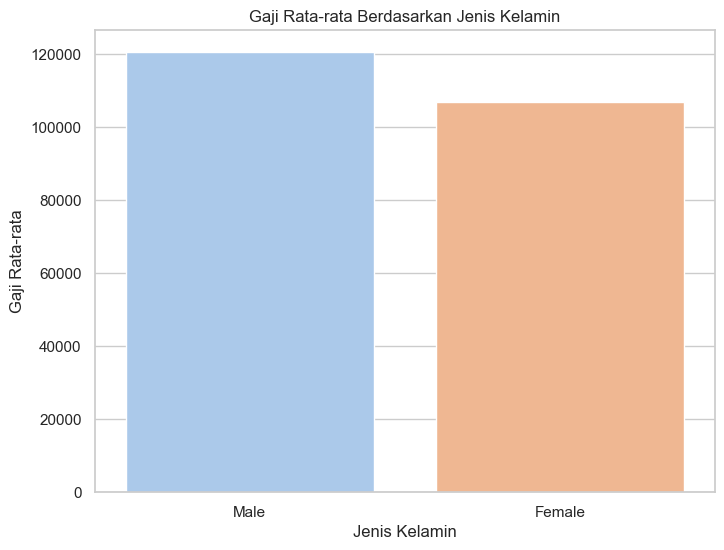

In [62]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Gender', y='Salary', data=df_work, errorbar=None, palette='pastel')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Gaji Rata-rata')
plt.title('Gaji Rata-rata Berdasarkan Jenis Kelamin')
plt.savefig("assets/gaji-berdasarkan-jenis-kelamin.png")
plt.show()


### b. Distribusi gaji di tiap negara

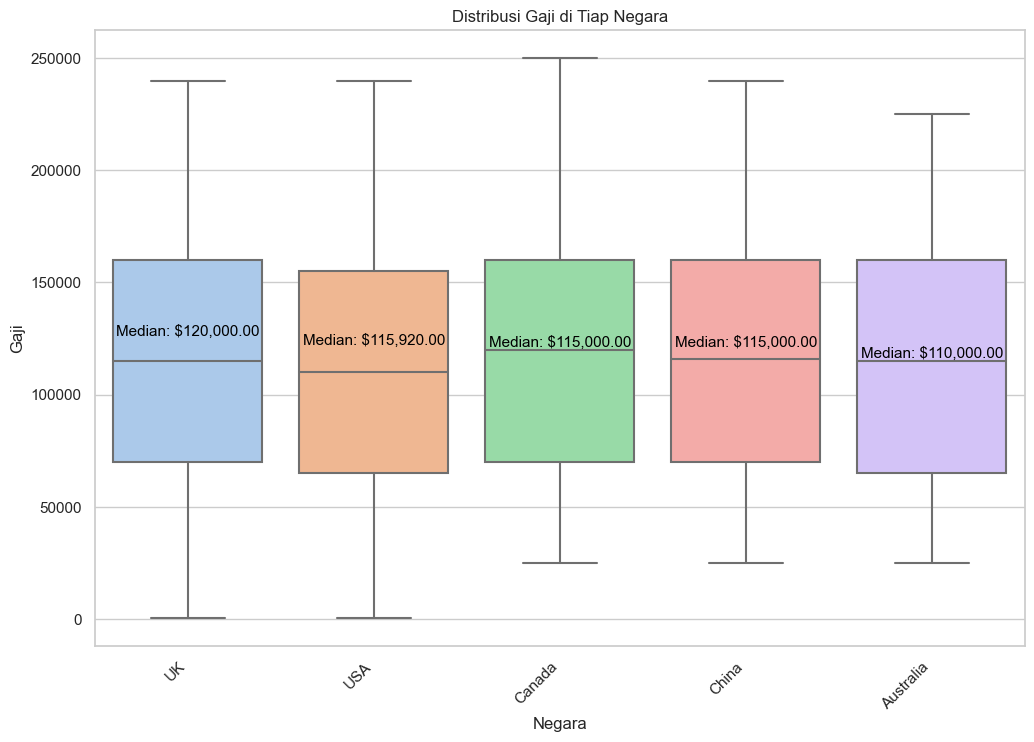

In [73]:
# Membuat boxplot untuk distribusi gaji di tiap negara
plt.figure(figsize=(12, 8))
sns.boxplot(x='Country', y='Salary', data=df, palette='pastel')
plt.xlabel('Negara')
plt.ylabel('Gaji')
plt.title('Distribusi Gaji di Tiap Negara')

# Menambahkan nilai-nilai statistik pada plot
medians = df.groupby('Country')['Salary'].median().sort_values(ascending=False)
for i, country in enumerate(medians.index):
    median_val = medians.loc[country]
    plt.text(i, median_val + 5000, f'Median: ${median_val:,.2f}', ha='center', va='bottom', color='black', fontsize=11)

plt.xticks(rotation=45, ha='right')
plt.savefig("assets/distribusi-gaji-tiap-negara.png")
plt.show()

### c. Apakah setiap negara memiliki proporsi data banyak orang yang sama?

In [74]:
proportion_by_country = df['Country'].value_counts(normalize=True)
print("Proporsi data banyak orang untuk setiap negara:")
print(proportion_by_country)

Proporsi data banyak orang untuk setiap negara:
USA          0.202873
China        0.200329
Australia    0.199731
UK           0.199282
Canada       0.197786
Name: Country, dtype: float64


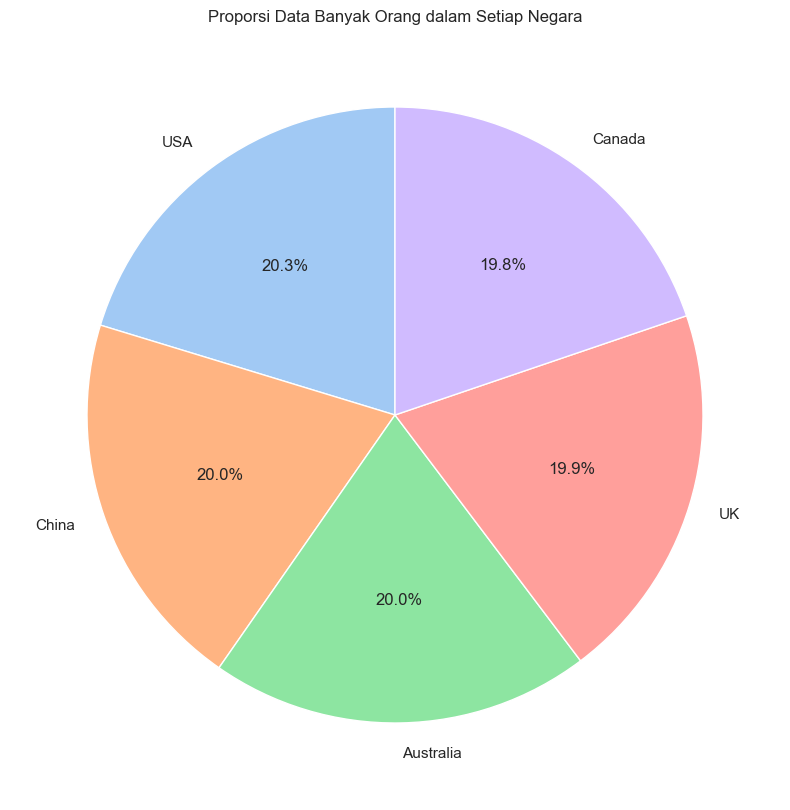

In [76]:
# Menghitung proporsi data banyak orang dalam setiap negara
proportions = df['Country'].value_counts(normalize=True)

# Membuat pie chart
plt.figure(figsize=(10, 10))
plt.pie(proportions, labels=proportions.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title('Proporsi Data Banyak Orang dalam Setiap Negara')
plt.savefig("assets/pie-chart-proporsi-negara.png")
plt.show()

### d. Berapa peluang seseorang tersebut adalah perempuan diketahui dia adalah Data Scientist?

In [83]:
# Menghitung jumlah individu yang perempuan dan bekerja sebagai Data Scientist
female_data_scientists = df[(df['Job Title'] == 'Data Scientist') & (df['Gender'] == 'Female')].shape[0]
print(f"Jumlah perempuan yang bekerja sebagai Data Scientist: {female_data_scientists}")

# Menghitung total individu yang bekerja sebagai Data Scientist
total_data_scientists = df[df['Job Title'] == 'Data Scientist'].shape[0]
print(f"Total individu yang bekerja sebagai Data Scientist: {total_data_scientists}")

# Menghitung peluang seseorang adalah perempuan jika diketahui dia adalah Data Scientist
probability_female_given_ds = female_data_scientists / total_data_scientists
print(f"Peluang seseorang adalah perempuan jika diketahui dia adalah Data Scientist: {probability_female_given_ds:.2f}")


Jumlah perempuan yang bekerja sebagai Data Scientist: 207
Total individu yang bekerja sebagai Data Scientist: 515
Peluang seseorang adalah perempuan jika diketahui dia adalah Data Scientist: 0.40


### e. Berapa peluang seseorang tersebut adalah laki-laki diketahui dia adalah Data Scientist?

In [89]:
# Menghitung jumlah individu yang perempuan dan bekerja sebagai Data Scientist
male_data_scientists = df[(df['Job Title'] == 'Data Scientist') & (df['Gender'] == 'Male')].shape[0]
print(f"Jumlah laki-laki yang bekerja sebagai Data Scientist: {male_data_scientists}")

# Menghitung total individu yang bekerja sebagai Data Scientist
total_data_scientists = df[df['Job Title'] == 'Data Scientist'].shape[0]
print(f"Total individu yang bekerja sebagai Data Scientist: {total_data_scientists}")

# Menghitung peluang seseorang adalah laki-laki jika diketahui dia adalah Data Scientist
probability_male_given_ds = male_data_scientists / total_data_scientists
print(f"Peluang seseorang adalah laki-laki jika diketahui dia adalah Data Scientist: {probability_male_given_ds:.2f}")


Jumlah laki-laki yang bekerja sebagai Data Scientist: 308
Total individu yang bekerja sebagai Data Scientist: 515
Peluang seseorang adalah laki-laki jika diketahui dia adalah Data Scientist: 0.60


# 3. Analisa Variabel Kontinu

### a. Mana yang lebih mungkin terjadi

### 1) Seseorang dengan pengalaman kerja di atas 12 tahun mendapatkan gaji di atas $160,000,

### 2) Seseorang dengan pengalaman kerja di bawah 12 tahun mendapatkan gaji di atas $160,000.

In [93]:
# Menghitung proporsi data dengan YoE di atas 12 tahun dan gaji di atas 160000
proporsi_experienced = len(df_work[(df_work['Years of Experience'] > 12) & (df_work['Salary'] > 160000)]) / len(df_work)

# Menghitung proporsi data dengan YoE di bawah 12 tahun dan gaji di atas 160000
proporsi_less_experienced = len(df_work[(df_work['Years of Experience'] <= 12) & (df_work['Salary'] > 160000)]) / len(df_work)

print(f"Proporsi data dengan YoE di atas 12 tahun dan gaji di atas $160,000: {proporsi_experienced:.2f}")
print(f"Proporsi data dengan YoE di bawah 12 tahun dan gaji di atas $160,000: {proporsi_less_experienced:.2f}")

# Menjawab pertanyaan
if proporsi_experienced > proporsi_less_experienced:
    jawaban = "Seseorang dengan pengalaman kerja di atas 12 tahun lebih mungkin mendapatkan gaji di atas $160,000."
else:
    jawaban = "Seseorang dengan pengalaman kerja di bawah 12 tahun lebih mungkin mendapatkan gaji di atas $160,000."

print(f"Jawaban: {jawaban}")


Proporsi data dengan YoE di atas 12 tahun dan gaji di atas $160,000: 0.16
Proporsi data dengan YoE di bawah 12 tahun dan gaji di atas $160,000: 0.07
Jawaban: Seseorang dengan pengalaman kerja di atas 12 tahun lebih mungkin mendapatkan gaji di atas $160,000.


### b. Mana yang lebih mungkin terjadi

### 1) Seseorang dengan posisi senior dengan YoE di atas 12 tahun mendapatkan gaji di atas $160,000, atau

### 2) Seseorang bukan posisi senior dengan YoE di atas 12 tahun mendapatkan gaji di atas $160,000

In [99]:
# Menghitung proporsi data seseorang posisi senior dengan YoE di atas 12 tahun dan gaji di atas 160000
proporsi_senior_experienced = len(df_work[(df_work['Senior'] == 1) & (df_work['Years of Experience'] > 12) & (df_work['Salary'] > 160000)]) / len(df_work)

# Menghitung proporsi data seseorang bukan posisi senior dengan YoE di atas 12 dan gaji di atas 160000
proporsi_non_senior_experienced = len(df_work[(df_work['Senior'] == 0) & (df_work['Years of Experience'] > 12) & (df_work['Salary'] > 160000)]) / len(df_work)

print(f"Proporsi data seseorang dengan posisi senior dan mendapatkan gaji di atas $160,000: {proporsi_senior_experienced:.2%}")
print(f"Proporsi data seseorang dengan posisi bukan senior dan mendapatkan gaji di atas $160,000: {proporsi_non_senior_experienced:.2%}")

# Menjawab pertanyaan
if proporsi_senior_experienced > proporsi_non_senior_experienced:
    jawaban = "Seseorang dengan posisi senior, YoE di atas 12 tahun lebih mungkin mendapatkan gaji di atas $160,000."
else:
    jawaban = "Seseorang bukan posisi senior, YoE di atas 12 tahun lebih mungkin mendapatkan gaji di atas $160,000."

print(f"Jawaban: {jawaban}")


Proporsi data seseorang dengan posisi senior dan mendapatkan gaji di atas $160,000: 5.15%
Proporsi data seseorang dengan posisi bukan senior dan mendapatkan gaji di atas $160,000: 10.86%
Jawaban: Seseorang bukan posisi senior, YoE di atas 12 tahun lebih mungkin mendapatkan gaji di atas $160,000.


# 4. Analisa Korelasi Variabel

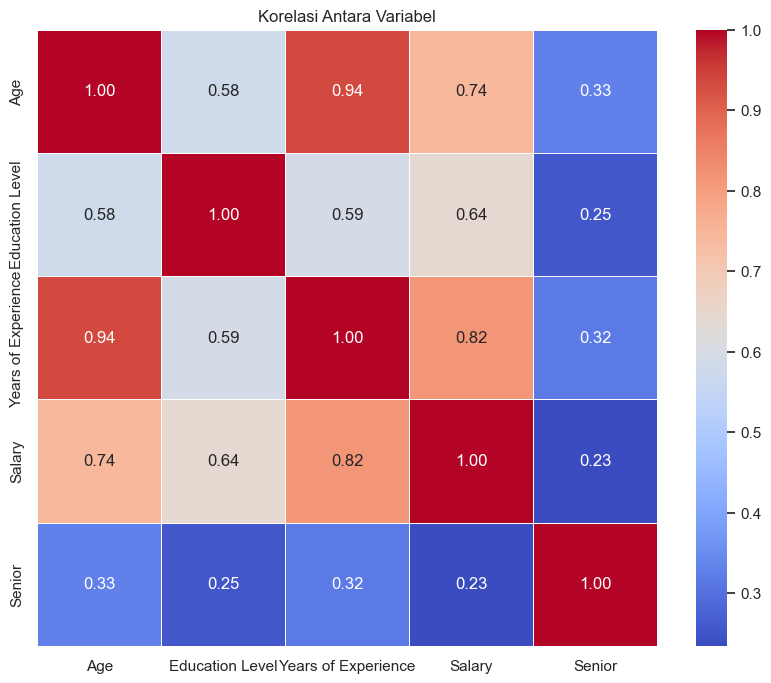

In [103]:
# Menghitung korelasi variabel
correlation_matrix = df_work[['Age', 'Education Level', 'Years of Experience', 'Salary', 'Senior']].corr()

# Memvisualisasikan korelasi dengan heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korelasi Antara Variabel')
plt.savefig("assets/korelasi-heatmap.png")
plt.show()


Dari grafik korelasi di atas, kita dapat melihat bahwa: 

1. usia memiliki korelasi positif yang kuat dengan tahun pengalaman (0,94), 
2. sedangkan posisi senior memiliki korelasi positif lemah dengan semua variabel lainnya. 
3. Selain itu, gaji memiliki korelasi positif sedang dengan tingkat pendidikan (0,64), usia (0,74), dan tahun pengalaman (0,82)

# 5. Pengujian Hipotesis

### 1. Apakah rata-rata gaji seseorang dengan posisi senior lebih tinggi daripada gaji seseorang dengan bukan posisi senior?

H0: Rata-rata gaji posisi senior = rata-rata gaji posisi non senioir

H1: Rata-rata gaji posisi senior > rata-rata gaji posisi non senior

In [105]:
# Membagi dataset menjadi kelompok
senior_position = df_work[df_work['Senior'] == 1]['Salary']
non_senior_position = df_work[df_work['Senior'] == 0]['Salary']

# Melakukan uji t independen
t_statistic, p_value = stats.ttest_ind(senior_position, non_senior_position, alternative='greater')

# Tingkat signifikansi
alpha = 0.05  

print("t-statistic:", t_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Hipotesis nol ditolak. Rata-rata gaji posisi senior lebih tinggi daripada gaji posisi non senior.")
else:
    print("Hipotesis nol diterima. Tidak ada bukti statistik yang cukup untuk menyimpulkan bahwa rata-rata gaji posisi senior perokok lebih tinggi daripada gaji non senior.")

t-statistic: 17.318080307138462
p-value: 1.1871292514548252e-65
Hipotesis nol ditolak. Rata-rata gaji posisi senior lebih tinggi daripada gaji posisi non senior.


### 2. Apakah proporsi seseorang dengan posisi senior laki-laki lebih besar dari perempuan?

H0: Proporsi posisi senior laki-laki <= proporsi posisi senior perempuan

H1: Proporsi posisi senior laki-laki > proporsi posisi senior perempuan

In [106]:
# Menghitung jumlah posisi senior laki-laki
senior_position_male = df_work[(df_work['Gender'] == 'Male') & (df_work['Senior'] == 1)].shape[0]

# Menghitung jumlah posisi senior perempuan
senior_position_female = df_work[(df_work['Gender'] == 'Female') & (df_work['Senior'] == 1)].shape[0]

# Menghitung total pegawai dengan posisi senior
total_senior_position = senior_position_male + senior_position_female

# Melakukan uji proporsi
count = [senior_position_male, senior_position_female]
nobs = [total_senior_position, total_senior_position]
z_statistic, p_value = proportions_ztest(count, nobs, alternative='larger')

# Tingkat signifikansi
alpha = 0.05  

print("z-statistic:", z_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Hipotesis nol ditolak. Proporsi posisi senior laki-laki lebih besar daripada proporsi posisi senior perempuan.")
else:
    print("Hipotesis nol diterima. Tidak ada bukti statistik yang cukup untuk menyimpulkan bahwa proporsi posisi senior laki-laki lebih besar daripada proporsi senior perempuan.")

z-statistic: 6.056101356183172
p-value: 6.973007460736766e-10
Hipotesis nol ditolak. Proporsi posisi senior laki-laki lebih besar daripada proporsi posisi senior perempuan.


### 3. Apakah variansi gaji seseorang dengan posisi senior dan posisi non senior sama?

H0: Vairansi gaji posisi senior = variansi gaji posisi non senior

H1: Variansi gaji posisi senior != variansi gaji posisi non senior

In [108]:
# Mengambil data gaji posisi senior dan non senior
salary_senior = df_work[df_work['Senior'] == 1]['Salary']
salary_non_senior = df_work[df_work['Senior'] == 0]['Salary']

# Melakukan uji F-test
f_statistic, p_value = stats.f_oneway(salary_senior, salary_non_senior)

# Tingkat signifikansi
alpha = 0.05  

print("F-statistic:", f_statistic)
print("p-value:", p_value)

if p_value < alpha:
    print("Hipotesis nol ditolak. Variansi gaji seseorang dengan posisi senior tidak sama dengan variansi gaji seseorang dengan posisi non senior.")
else:
    print("Hipotesis nol diterima. Tidak ada bukti statistik yang cukup untuk menyimpulkan bahwa variansi gaji seseorang dengan posisi senior sama dengan variansi gaji seseorang dengan posisi non senior.")

F-statistic: 299.91590552449725
p-value: 2.3742585029103998e-65
Hipotesis nol ditolak. Variansi gaji seseorang dengan posisi senior tidak sama dengan variansi gaji seseorang dengan posisi non senior.
